In [1]:
import pandas as pd

In [2]:
df_jan = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")
df_feb = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet")

In [3]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


# Q1 Downloading the data

In [4]:
df_jan.shape

(3066766, 19)

# Q2 Ensure datetime format

In [5]:
# Ensure datetime format
df_jan["tpep_pickup_datetime"] = pd.to_datetime(df_jan["tpep_pickup_datetime"])
df_jan["tpep_dropoff_datetime"] = pd.to_datetime(df_jan["tpep_dropoff_datetime"])

In [6]:
# Compute duration in minutes
df_jan["duration"] = (df_jan["tpep_dropoff_datetime"] - df_jan["tpep_pickup_datetime"]).dt.total_seconds() / 60

# Remove negative or zero durations (possible data issues)
df_jan = df_jan[df_jan["duration"] > 0]

# Compute standard deviation
std_duration = df_jan["duration"].std()

print(f"Standard deviation of trip duration in January: {std_duration:.3f} minutes")

Standard deviation of trip duration in January: 42.601 minutes


In [7]:
df_jan["duration"].describe()

count    3.065645e+06
mean     1.567475e+01
std      4.260107e+01
min      1.666667e-02
25%      7.116667e+00
50%      1.153333e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

# Q3 Dropping outliers

In [8]:
df_jan["duration"].describe()

count    3.065645e+06
mean     1.567475e+01
std      4.260107e+01
min      1.666667e-02
25%      7.116667e+00
50%      1.153333e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

<Axes: ylabel='duration'>

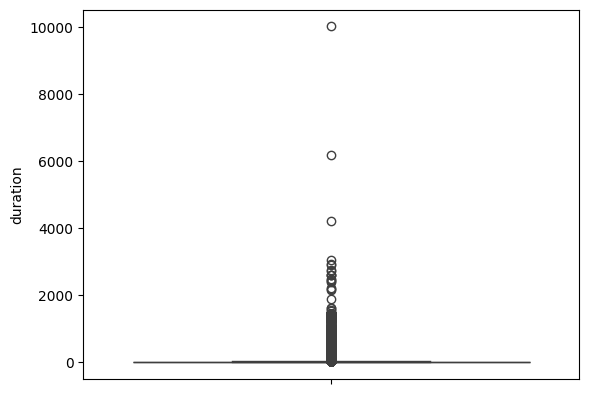

In [9]:
# Box Plot
import seaborn as sns
sns.boxplot(df_jan["duration"])

In [10]:
# Total number of records before filtering
total_before = len(df_jan)

#filtering
df_jan_new = df_jan[(df_jan["duration"] >= 1) & (df_jan["duration"] <= 60)]

# Total number of records after filtering
total_after = len(df_jan_new)

# Calculate the fraction
fraction = total_after / total_before
print(f"Fraction of records left: {fraction:.4f}")

Fraction of records left: 0.9816


In [11]:
total_after

3009173

<Axes: ylabel='duration'>

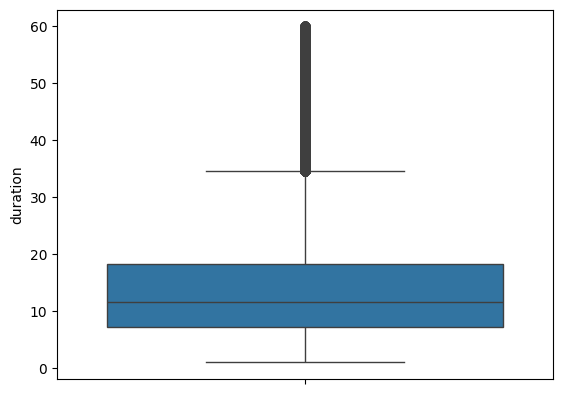

In [12]:
# Box Plot
import seaborn as sns
sns.boxplot(df_jan_new["duration"])

# Question 4. One-hot encoding

In [13]:
df_jan_new.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [14]:
df_jan_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3009173 entries, 0 to 3066765
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [15]:
feat = ['PULocationID', 'DOLocationID']

df_jan_new.loc[:, feat] = df_jan_new[feat].astype(str)

/tmp/ipykernel_73394/3582552824.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['161' '43' '48' ... '114' '230' '262']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_jan_new.loc[:, feat] = df_jan_new[feat].astype(str)
/tmp/ipykernel_73394/3582552824.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['141' '237' '238' ... '239' '79' '143']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_jan_new.loc[:, feat] = df_jan_new[feat].astype(str)


In [16]:
train_dicts = df_jan_new[feat].to_dict(orient='records')

In [17]:
train_dicts

[{'PULocationID': '161', 'DOLocationID': '141'},
 {'PULocationID': '43', 'DOLocationID': '237'},
 {'PULocationID': '48', 'DOLocationID': '238'},
 {'PULocationID': '138', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '79'},
 {'PULocationID': '161', 'DOLocationID': '137'},
 {'PULocationID': '239', 'DOLocationID': '143'},
 {'PULocationID': '142', 'DOLocationID': '200'},
 {'PULocationID': '164', 'DOLocationID': '236'},
 {'PULocationID': '141', 'DOLocationID': '107'},
 {'PULocationID': '234', 'DOLocationID': '68'},
 {'PULocationID': '79', 'DOLocationID': '264'},
 {'PULocationID': '164', 'DOLocationID': '143'},
 {'PULocationID': '138', 'DOLocationID': '33'},
 {'PULocationID': '33', 'DOLocationID': '61'},
 {'PULocationID': '79', 'DOLocationID': '186'},
 {'PULocationID': '90', 'DOLocationID': '48'},
 {'PULocationID': '113', 'DOLocationID': '255'},
 {'PULocationID': '237', 'DOLocationID': '239'},
 {'PULocationID': '143', 'DOLocationID': '229'},
 {'PULocationID': '137', 'DOLocat

In [18]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [19]:
X_train.shape

(3009173, 515)

#The dimension (number of columns) is 515

# Q5 Training a model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

target = 'duration'
y_train = df_jan_new[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

7.6492624397080675

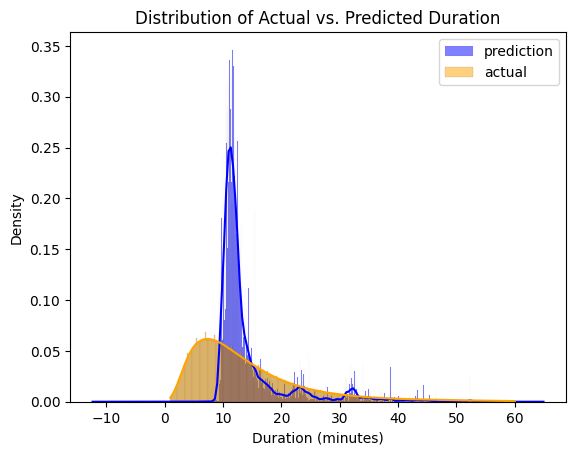

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_pred, label='prediction', color='blue', kde=True, stat="density")
sns.histplot(y_train, label='actual', color='orange', kde=True, stat="density")

plt.legend()
plt.title("Distribution of Actual vs. Predicted Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Density")
plt.show()

# Q6 Evaluating the model

In [22]:
# Ensure datetime format
df_feb["tpep_pickup_datetime"] = pd.to_datetime(df_feb["tpep_pickup_datetime"])
df_feb["tpep_dropoff_datetime"] = pd.to_datetime(df_feb["tpep_dropoff_datetime"])

df_feb['duration'] = (df_feb.tpep_dropoff_datetime - df_feb.tpep_pickup_datetime).dt.total_seconds() / 60
df_feb = df_feb[(df_feb.duration >= 1) & (df_feb.duration <= 60)].copy()

df_feb['PULocationID'] = df_feb['PULocationID'].astype(str)
df_feb['DOLocationID'] = df_feb['DOLocationID'].astype(str)

dicts_val = df_feb[['PULocationID', 'DOLocationID']].to_dict(orient='records')
X_val = dv.transform(dicts_val)
y_val = df_feb['duration']

In [23]:
y_pred_val = lr.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred_val)
print(rmse_val)

7.81181211389241


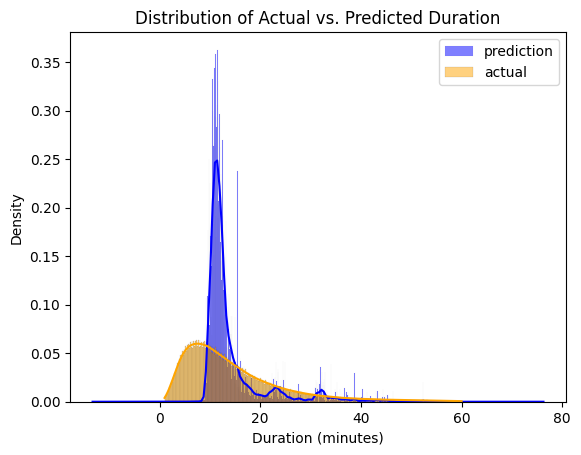

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_pred_val, label='prediction', color='blue', kde=True, stat="density")
sns.histplot(y_val, label='actual', color='orange', kde=True, stat="density")

plt.legend()
plt.title("Distribution of Actual vs. Predicted Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Density")
plt.show()